# ML Tutorial Day 8

## Logistic Regression

We saw that linear regression was used to predict values for `Home Prices`, `Weather`, `Stock Prices`, etc., where the predicted value belongs to a continuous domain. If we want to make predictions in the following scenarios, linear regression will not be useful:
1. if an email is spam or not
2. will a customer buy life insurance
3. which party will a person vote for during elections

Linear regression fails in these cases because the predicted value is categorical, with defined values as it doesn't belong to a continuous domain.

The problems with categorical values are called `Classification` problems and logistic regression is the technique used for classification.

Classification can be further divided into to types:
1. Binary: When only two options are available, like, in a yes/no type scenario.
2. Multiclass: When more than two options are available

## Binary Classification

In [ ]:
import pandas as pd
from sklearn import linear_model as linMod
from matplotlib import pyplot as plt
import numpy as np

# importing data
df = pd.read_csv('insurance_data.csv')
df

Off the bat, we can see that younger people tend to not buy insurance, while older people usually have it. First, we'll plot and visualize the data.

In [ ]:
plt.xlabel('Age')
plt.ylabel('Have Insurance?')
plt.yticks([0, 0.5, 1])
plt.plot(df['age'], df['bought_insurance'], 'rx')
plt.show()

# Logistic Regression
The sigmoid function used for logistic regression is given as follows:

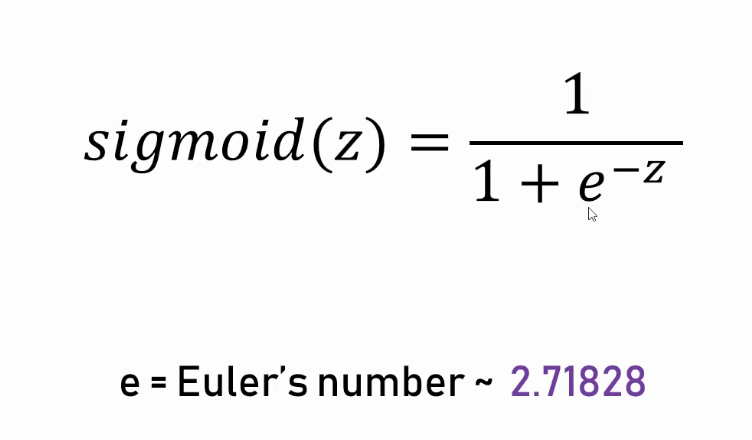

This functions maps any input from $\mathbb{R}$ to $[0,1]$


This article explains in depth [why sigmoid](https://www.dailydoseofds.com/why-do-we-use-sigmoid-in-logistic-regression/) function is the preferred choice. We will see how does the sigmoid function looks like:

In [ ]:
x = np.linspace(-10, 10, num = 500)
y = [1/(1+(np.exp(-i))) for i in x]
plt.plot(x, y)

Now we will train a model on our data to make predictions. The logistic regression gives us a probability of the given belonging to a particular class.

In [ ]:
# dividing the data into training and testing sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df[['age']], df['bought_insurance'], test_size = 0.1)

# training the model
logreg = linMod.LogisticRegression()
logreg.fit(X_train.values, y_train.values)

In [ ]:
# testing the model
logreg.predict(X_test.values)

In [ ]:
# testing the model
logreg.score(X_test.values, y_test.values)

In [ ]:
# showing the probability of a datapoint being in a class
logreg.predict_proba([[73]])

## Multiclass Classification

Now we will try to classify when we have multiple classes to which an input might belong. We will create a multiclass logistic regression model using pre-defined data in the `sklearn` module.

In [ ]:
import matplotlib.pyplot as plt

# loading the digits dataset
from sklearn.datasets import load_digits

# creating an object of load_digits()
digit = load_digits()

# 8x8 array encoding the image
digit.data[0]

In [ ]:
plt.gray()
plt.matshow(digit.images[3])

# this is the label for the image
digit.target[3]

# so data has the numeric representation of the images while target has the label for corresponding images. We can use data and target to train our model

In [ ]:
# creating our training and testing datasets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(digit.data, digit.target, test_size = 0.2)

In [ ]:
# training the model
from sklearn import linear_model as linMod

logreg = linMod.LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
# testing the model accuracy
logreg.score(X_test, y_test)

In [ ]:
# getting a random datapoint
input_val = 67
plt.matshow(digit.images[input_val])
digit.target[input_val]

In [ ]:
logreg.predict([digit.data[input_val]])

Now the accuracy of our model is realy good, but it isn't 100%. So we want to understand where the model didn't do good, and to do that, we can use the confusion matrix.

In [ ]:
# understanding the model accuracy
from sklearn.metrics import confusion_matrix

# getting the predicted value of X_test
y_predicted = logreg.predict(X_test)

confm = confusion_matrix(y_test, y_predicted)
confm

In [ ]:
# for better visualisation, we will use seaborn
import seaborn as sn
# plt.figure(fi)
sn.heatmap(confm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

The heatmap above shows us that 1 time when the image was of an `8`, our model predicted it to be 1 and similarly, in all the off-diagonal positions, if the element is not `0`, that means our model predicted the wrong value.